<a href="https://colab.research.google.com/github/leuctr/Data-Science-Alura-Primeiros-Passos/blob/main/Data_Science_Primeiros_Passos_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando biblioteca e primeiras análises

In [ ]:
import pandas as pd
notas = pd.read_csv("ratings.csv")
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Quantidade total de avaliações, colunas

In [ ]:
notas.shape

(100836, 4)

Alterando Titulo das Colunas

In [ ]:
notas.columns= ["usuarioId", "filmeId", "nota", "momento"]

In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Separando as notas que existem no arquivo

In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Quantidade de avaliações por notas

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

Media e Mediana das notas existentes no arquivo

In [ ]:
print ("Media",notas['nota'].mean())
print ("Mediana",notas['nota'].median())

Media 3.501556983616962
Mediana 3.5


Todas as Notas

In [ ]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [ ]:
notas.nota.head()


0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

# Plotando e utilizando gráficos

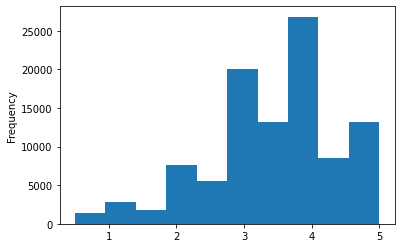

In [ ]:
notas.nota.plot(kind="hist")

In [ ]:
 notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Biblioteca Seaborn

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


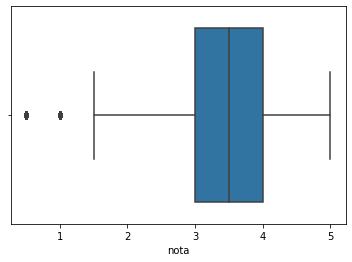

In [ ]:
import seaborn as sns 

sns.boxplot(notas.nota)

In [ ]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ("filmeId", "titulo", "generos")
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando a nota de Filme Especifico

In [ ]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [ ]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [ ]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

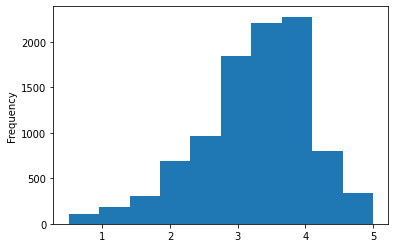

In [ ]:
medias_por_filme.plot(kind="hist")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


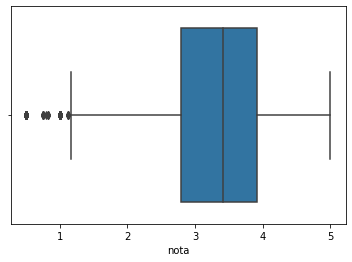

In [ ]:
sns.boxplot(medias_por_filme)

In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


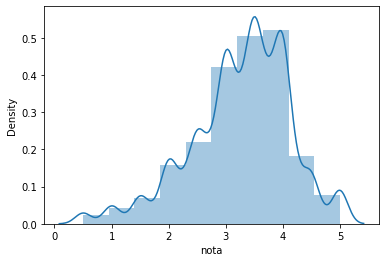

In [ ]:
sns.distplot(medias_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das medias dos filmes')

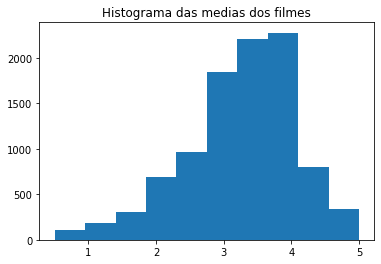

In [ ]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das medias dos filmes")

# Diferentes tipos de Dados

In [ ]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique() # Categoria Nominal - não existe grau, não tem maioridade sobre as outras. São apenas categorias

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
# Exemplo de categoria ordinal - Uma depende da outra para ser iniciada. Também, o primeiro grau vem antes do segundo e etc.
# primeiro grau
# segundo grau
# terceiro grau

In [ ]:
# Budget => orçamento => quantitativa continuo (orçamento nas tabelas Ex. 345,34 - 345,35)

In [ ]:
# Quantitativa intervalar 
# quantidade de votos => 1, 2, 3, 4, 5....

Extraindo Dados atraves de categoria nominal. Para extrair algum dado, foi necessário comparar a quantidade de vezes que cada lingua apaeceu no documento.

In [ ]:
tmdb.original_language.value_counts() 
#apenas 1 coluna com valores. O indice não apesenta valores, devido a isso não são duas colunas (exemplo abaixo)
# é uma série

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
he       3
th       3
cs       2
ar       2
ro       2
id       2
ta       2
nb       1
no       1
ps       1
pl       1
hu       1
af       1
is       1
tr       1
vi       1
ky       1
el       1
sl       1
xx       1
te       1
Name: original_language, dtype: int64

In [ ]:
tmdb.original_language.value_counts().index #indice

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'nl', 'fa', 'he', 'th', 'cs', 'ar', 'ro', 'id', 'ta', 'nb',
       'no', 'ps', 'pl', 'hu', 'af', 'is', 'tr', 'vi', 'ky', 'el', 'sl', 'xx',
       'te'],
      dtype='object')

In [ ]:
tmdb.original_language.value_counts().values #valores

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [ ]:
tmdb.original_language.value_counts().to_frame()
#É UM DATAFRAME

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ko,11


In [ ]:
#transformando uma série em dataframe
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
#resetando o indice.
# notavel que criou uma "coluna" para indicar o indice
contagem_de_lingua.columns = ["original_language","total"] # renomeando as colunas
contagem_de_lingua.head() # imprimindo apenas os 5 primeiros


,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


# Plotando as informações - Keggle

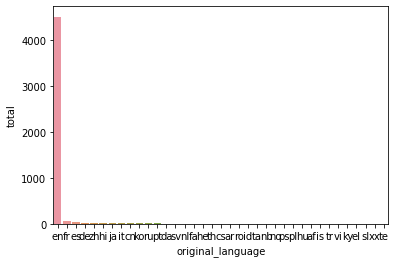

In [ ]:
sns.barplot(x="original_language", y = "total", data=contagem_de_lingua)
#utilizando SEABORN para plotar as linguagens dos filmes 
# foi necessário isolar (value_count)
# depois transformar em um data frame
# resetar o indice
# resetar o nome das colunas
# BAIXO NIVEL

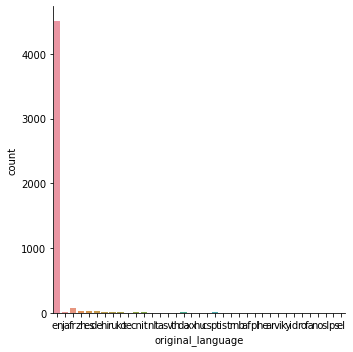

In [ ]:
sns.catplot(x = "original_language",kind = "count", data = tmdb)
# criando o mesmo gráfico porém de alto nível

([<matplotlib.patches.Wedge at 0x7f54fda73b10>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

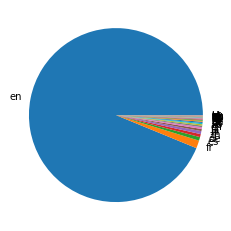

In [ ]:
plt.pie(contagem_de_lingua["total"], labels= contagem_de_lingua["original_language"])
# gráfico pizza
# não utilizar

Comparando todas as linguas com inglês. 

In [ ]:
total_por_lingua = tmdb["original_language"].value_counts() #total de linguas
total_geral = total_por_lingua.sum() # soma de todas as linguas
total_ingles = total_por_lingua.loc["en"] # qntd total de linguas em inglês
total_resto = total_geral - total_ingles # total de linguas além do ingles (todas juntas)
print(total_ingles, total_resto)

4505 298


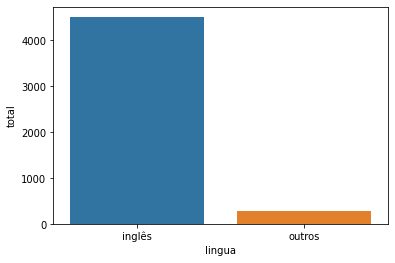

In [ ]:
dados = {
    'lingua' : ['inglês', 'outros'],
    'total' : [total_ingles, total_resto]
}

dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data = dados)

In [ ]:
# analisar diferente de inglês
tmdb.query("original_language != 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

Plotando os dados sem a lingua Inglês

In [ ]:
total_de_filmes_outras_linguas = tmdb.query("original_language != 'en'").original_language.value_counts()
total_de_filmes_outras_linguas

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
id     2
ta     2
ro     2
cs     2
ar     2
no     1
el     1
pl     1
hu     1
nb     1
af     1
tr     1
ps     1
ky     1
sl     1
is     1
te     1
vi     1
xx     1
Name: original_language, dtype: int64

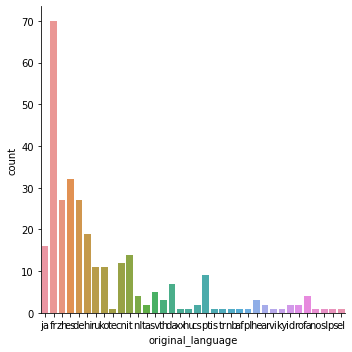

In [ ]:
filmes_sem_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x="original_language",kind = "count", data = filmes_sem_ingles)

# Melhorando a visualização - DATA VISUALIZATION


In [ ]:
filmes_sem_ingles = tmdb.query("original_language != 'en'").original_language.value_counts()
filmes_sem_ingles

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
he     3
th     3
id     2
ta     2
ro     2
cs     2
ar     2
no     1
el     1
pl     1
hu     1
nb     1
af     1
tr     1
ps     1
ky     1
sl     1
is     1
te     1
vi     1
xx     1
Name: original_language, dtype: int64

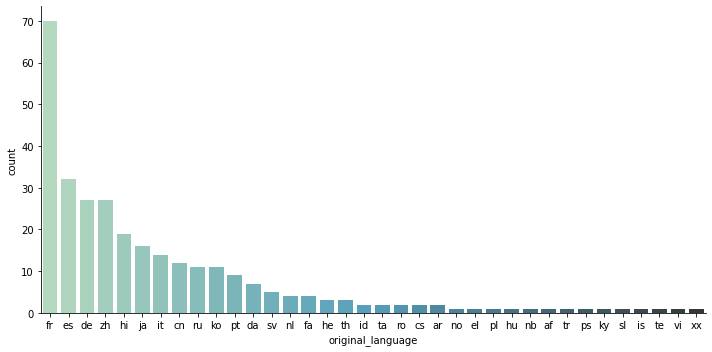

In [ ]:
sns.catplot(x="original_language",kind = "count", data = filmes_sem_ingles,
            aspect = 2,
            palette = "GnBu_d",
            order = total_de_filmes_outras_linguas.index)
